In [1]:
#Libraries
# OS
import os

# Dataframe & array 
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

# Stats 
from scipy import stats 
import math

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.models import save_model, load_model

# Metrics & preprocessing 
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

# Warning 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\niraj\OneDrive\Desktop\airlinee_2m.csv", encoding='ISO-8859-1')


In [3]:
for column in df.columns:
    print(f"{column.ljust(20)}\t\t{df[column].dtype}")

Year                		int64
Quarter             		int64
Month               		int64
DayofMonth          		int64
DayOfWeek           		int64
FlightDate          		object
Reporting_Airline   		object
DOT_ID_Reporting_Airline		int64
IATA_CODE_Reporting_Airline		object
Tail_Number         		object
Flight_Number_Reporting_Airline		int64
OriginAirportID     		int64
OriginAirportSeqID  		int64
OriginCityMarketID  		int64
Origin              		object
OriginCityName      		object
OriginState         		object
OriginStateFips     		float64
OriginStateName     		object
OriginWac           		int64
DestAirportID       		int64
DestAirportSeqID    		int64
DestCityMarketID    		int64
Dest                		object
DestCityName        		object
DestState           		object
DestStateFips       		float64
DestStateName       		object
DestWac             		int64
CRSDepTime          		int64
DepTime             		float64
DepDelay            		float64
DepDelayMinutes     		float64
DepDel15            		float64
De

In [4]:

data = df.loc[df['Cancelled'] == 0.0]
data = data[['DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'OriginAirportID', 'DestAirportID', 'CRSDepTime', 'CRSArrTime', 'DepDelayMinutes']]

In [5]:
data.head(10)

,DayofMonth,DayOfWeek,Reporting_Airline,OriginAirportID,DestAirportID,CRSDepTime,CRSArrTime,DepDelayMinutes
0,2,5,NW,13487,14869,1640,1836,19.0
1,28,4,FL,13342,13204,1204,1541,0.0
2,29,6,MQ,11921,11298,1630,1945,14.0
3,31,2,DL,12892,11433,1305,2035,0.0
4,15,7,US,11618,11057,1820,2026,51.0
5,29,3,DL,11298,14814,639,730,0.0
6,7,1,CO,10721,11042,1755,2000,0.0
7,11,2,9E,10397,10868,1950,2057,221.0
8,3,7,YV,13930,11042,1550,1810,2.0
9,8,4,WN,13232,11259,2030,2250,16.0


In [6]:
data.dropna(inplace = True)


In [7]:
labelencoder = LabelEncoder()
data['Reporting_Airline'] = labelencoder.fit_transform(data['Reporting_Airline'])
data['OriginAirportID'] = labelencoder.fit_transform(data['OriginAirportID'])
data['DestAirportID'] = labelencoder.fit_transform(data['DestAirportID'])

data['CRSDepTime'] = (data['CRSDepTime']/100)
data['CRSArrTime'] = (data['CRSArrTime']/100)
data.rename(columns = {'CRSDepTime':'DepTime', 'CRSArrTime':'ArrTime'}, inplace = True)

data['DepDelayMinutes'] = data['DepDelayMinutes'].astype(int)
     

data

,DayofMonth,DayOfWeek,Reporting_Airline,OriginAirportID,DestAirportID,DepTime,ArrTime,DepDelayMinutes
0,2,5,18,261,355,16.40,18.36,19
1,28,4,10,247,236,12.04,15.41,0
2,29,6,16,147,103,16.30,19.45,14
3,31,2,6,210,111,13.05,20.35,0
4,15,7,27,126,80,18.20,20.26,51
...,...,...,...,...,...,...,...,...
1999995,23,7,29,208,294,14.40,15.50,4
1999996,5,2,4,126,103,9.45,12.42,0
1999997,14,5,27,72,80,12.25,13.19,0
1999998,15,2,29,237,47,18.30,19.50,8


In [8]:
x = data[['DayofMonth','DayOfWeek','Reporting_Airline','OriginAirportID','DestAirportID','DepTime','ArrTime']].values
y = data['DepDelayMinutes'].values

In [9]:
#Split into Test and Train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)
     

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1472608, 7) (490870, 7) (1472608,) (490870,)


In [10]:
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

# Delay Prediction Model:


In [11]:
#This is the prediction model for prediction how long the delay with be looking at given attributes
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [12]:
df = pd.read_csv(r"C:\Users\niraj\OneDrive\Desktop\airlinee_2m.csv", encoding='ISO-8859-1')#imported dataset
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
#This filters out cancellations as we are only focusing on delays
df1 = df.loc[df['Cancelled'] == 0.0]
df1 = df1.loc[df1['DepDelayMinutes'] > 0.0]
#DEP_DELAY_MINUTES is being used instead of DEP_DELAY because it filters out negative values
#Since nominal values are more difficult to create a regression model with, we are using a few attributes
df2 = df1[['DayOfWeek','Reporting_Airline', 'DepDelayMinutes']]
df2.head()

,DayOfWeek,Reporting_Airline,DepDelayMinutes
0,5,NW,19.0
2,6,MQ,14.0
4,7,US,51.0
7,2,9E,221.0
8,7,YV,2.0


In [13]:
#Seperates Reporting Airlines into boolean dummy attributes 
df_dummy1 = pd.get_dummies(df2["DayOfWeek"])
df_dummy2 = pd.get_dummies(df2["Reporting_Airline"])
#combines all dummies
df3 = pd.concat([df_dummy1, df_dummy2, df2], axis = 1)
#dropping original attributes so that they are all dummy except for dependent variable
df4 = df3
df4.drop(["DayOfWeek", "Reporting_Airline"],axis = 1, inplace = True, errors='ignore')
df4.head()

,1,2,3,4,5,6,7,9E,AA,AS,B6,CO,DH,DL,EA,EV,F9,FL,G4,HA,HP,KH,ML (1),MQ,NK,NW,OH,OO,PA (1),PI,PS,TW,TZ,UA,US,VX,WN,XE,YV,YX,DepDelayMinutes
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14.0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,51.0
7,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,221.0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.0


[34.6870575  32.31764221 23.87663269 ... 26.50045776 40.29414368
 18.37846375]


,Actual Value,Predicted value,Difference
0,53.0,34.687057,18.312943
1,2.0,32.317642,-30.317642
2,1.0,23.876633,-22.876633
3,10.0,20.693573,-10.693573
4,3.0,25.597366,-22.597366
5,1.0,18.378464,-17.378464
6,4.0,20.633621,-16.633621
7,19.0,24.531174,-5.531174
8,6.0,22.965256,-16.965256
9,64.0,19.945572,44.054428


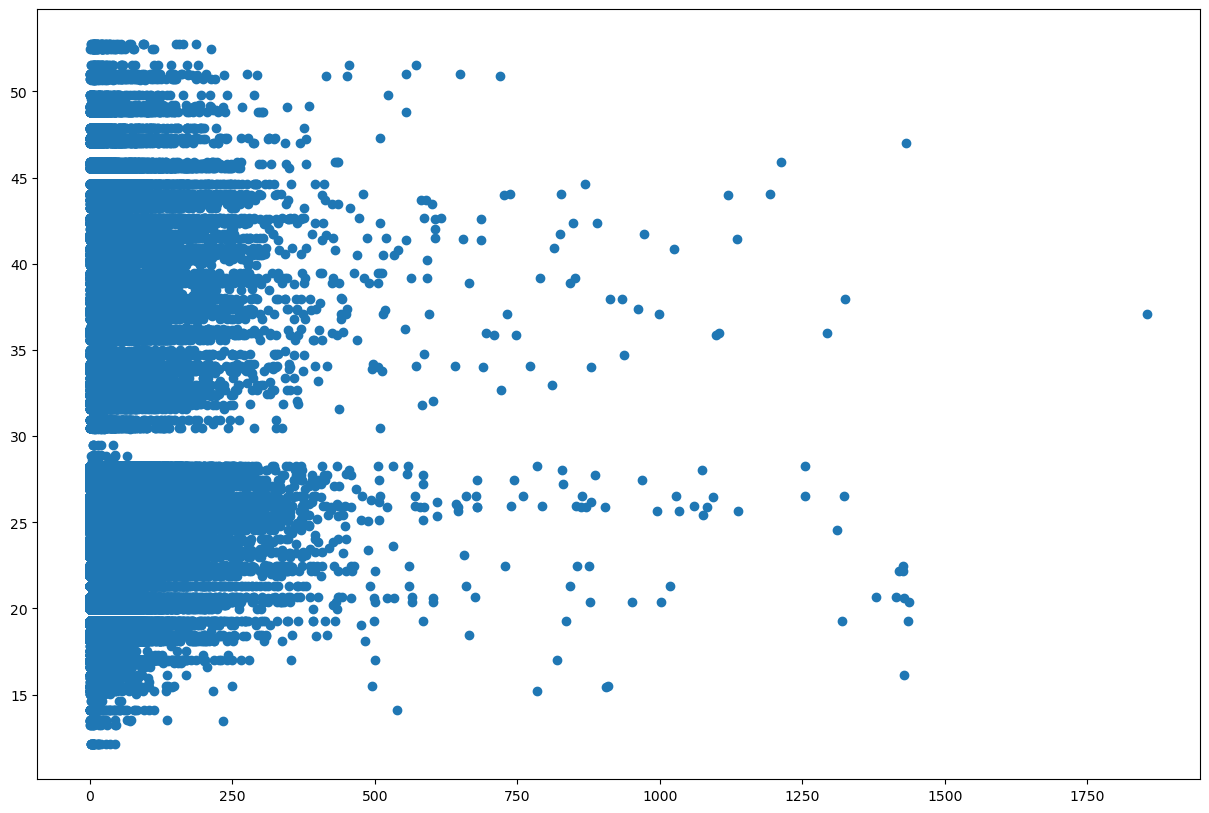

In [14]:
#Define X and Y
x = df4.drop(['DepDelayMinutes'],axis=1).values
y = df4['DepDelayMinutes'].values
#Split into Test and Train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=0)
#Train the model on training set
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)
y_pred=ml.predict(x_test)
print(y_pred)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
#Scatter plot
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
#predicted values
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:20]
     

# Neural Network

In [11]:
model = Sequential([
    Dense(128, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(128, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
     

In [12]:
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=0.01), metrics=[msle])

In [13]:
# training the model
history = model.fit(x_train, y_train, epochs=200, batch_size=1024, validation_split=0.2)

Epoch 1/200
1151/1151 [==============================] - 15s 12ms/step - loss: 2.0595 - mean_squared_logarithmic_error: 2.0594 - val_loss: 2.0366 - val_mean_squared_logarithmic_error: 2.0364
Epoch 2/200
1151/1151 [==============================] - 12s 11ms/step - loss: 2.0470 - mean_squared_logarithmic_error: 2.0472 - val_loss: 2.0302 - val_mean_squared_logarithmic_error: 2.0300
Epoch 3/200
1151/1151 [==============================] - 13s 11ms/step - loss: 2.0432 - mean_squared_logarithmic_error: 2.0432 - val_loss: 2.0312 - val_mean_squared_logarithmic_error: 2.0310
Epoch 4/200
1151/1151 [==============================] - 16s 14ms/step - loss: 2.0416 - mean_squared_logarithmic_error: 2.0415 - val_loss: 2.0331 - val_mean_squared_logarithmic_error: 2.0329
Epoch 5/200
1151/1151 [==============================] - 12s 11ms/step - loss: 2.0410 - mean_squared_logarithmic_error: 2.0411 - val_loss: 2.0261 - val_mean_squared_logarithmic_error: 2.0259
Epoch 6/200
1151/1151 [======================

In [14]:
# predicting the delays for test data
y_pred = model.predict(x_test)
y_pred = y_pred.astype(int)
     



15340/15340 [==============================] - 26s 2ms/step


In [15]:
print("Accuracy_score=",accuracy_score(y_test,y_pred))

Accuracy_score= 0.22806649418379613
